Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import matplotlib.pyplot as plt

import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
import os
import tarfile
import urllib
import pandas as pd

def load_patient_data(csv_path):
    return pd.read_csv(csv_path)

patient = load_patient_data("heartdisease.csv") # we load the pandas dataframe

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [5]:
patient.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
patient.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
patient.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

There are some datafield types that require preprocessing. The data types are the categorial features such as sex,
cp, slope, etc. They need to be one-hot encoded in the pipeline in order to be useful for the machine learning
algorithm. There are no null value that need to be imputed though, as shown by the previous run cell. The numerical features will simply be pipelined into a standard scalar to have a mean of 0 and standard deviation of 1 to arrange the data in a normal distribution. 

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [8]:
patient['sick'] = patient['sick'].astype(int)

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

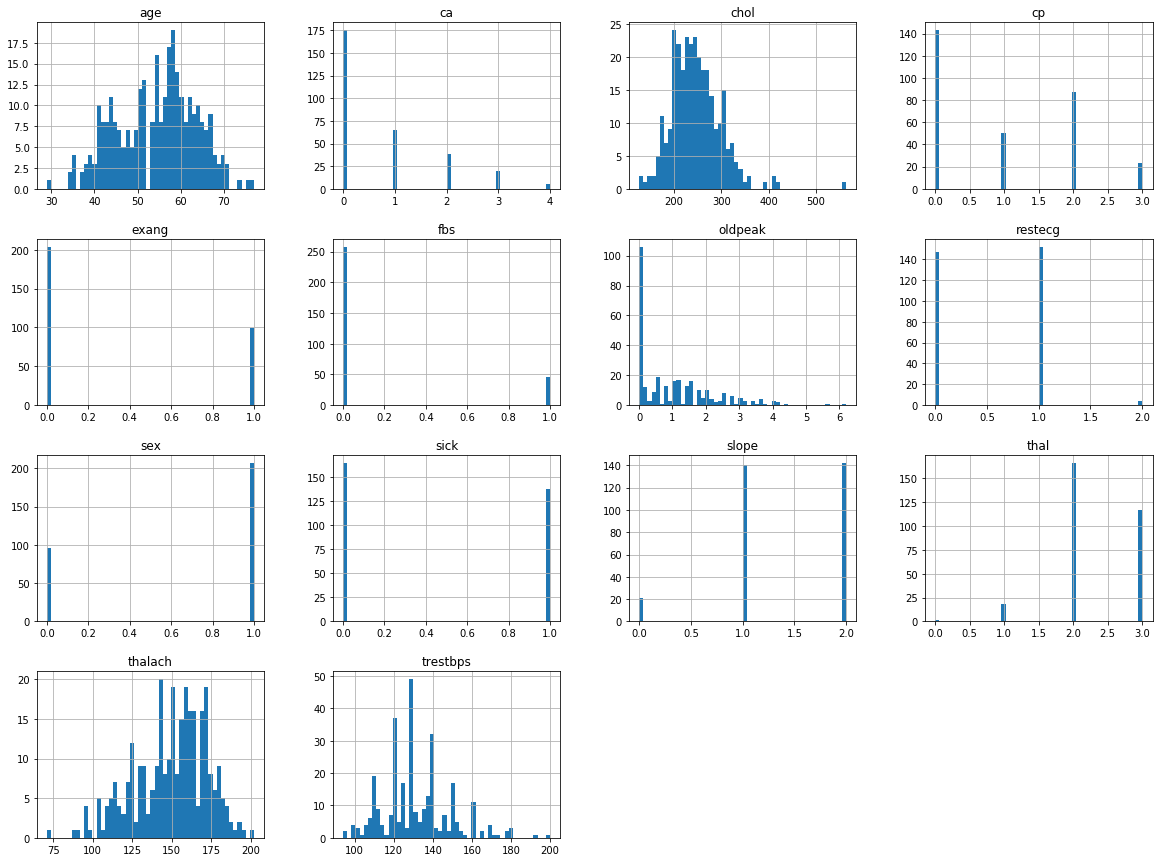

In [9]:
patient.hist(bins=50, figsize=(20,15))
plt.show()

We have quite a lot of different variables in the data. Some of them can be considered as gradient as they are numerical, such as age, chol, talach and restbps. We also have some discrete values which are limited selection such as ca, cp, thal, etc. Then we have the last cateogry as binary which is either 0 or 1. These variables are like sex, sick, exang and fbs.

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

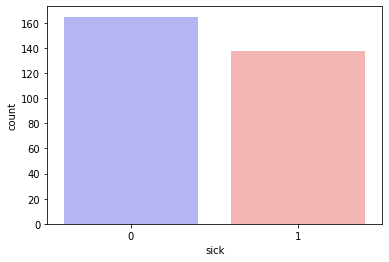

0    165
1    138
Name: sick, dtype: int64

In [10]:
import seaborn as sns

sns.countplot(x="sick", data=patient, palette="bwr")
plt.show()
patient['sick'].value_counts()

It seems like there are about a good equal number of sick and healthy individuals, with 165 being healthy
and 138 being sick. Therefore, we can say that we have a relatively balanced dataset which will be good for training and testing.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

The usual method to artifically balancing a dataset, would be to drop the dataset to make it equal.
For example, given 165 healthy individuals and 138 sick individuals, we can't increase 138 to 165 because that would
mean fabricating data out of thin air... which is not possible.
Instead we would have to drop 165 healthy individuals to 138. 
This is not advisible as it results in a big loss of data, for arbitrarily large datasets this is okay.
But imagine a dataset where 98% is healthy and 2% are sick, this would mean to balance the dataset we would need to
effectivley drop 96% of our dataset. 

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [11]:
corr_matrix = patient.corr()
corr_matrix["sick"].sort_values(ascending=False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

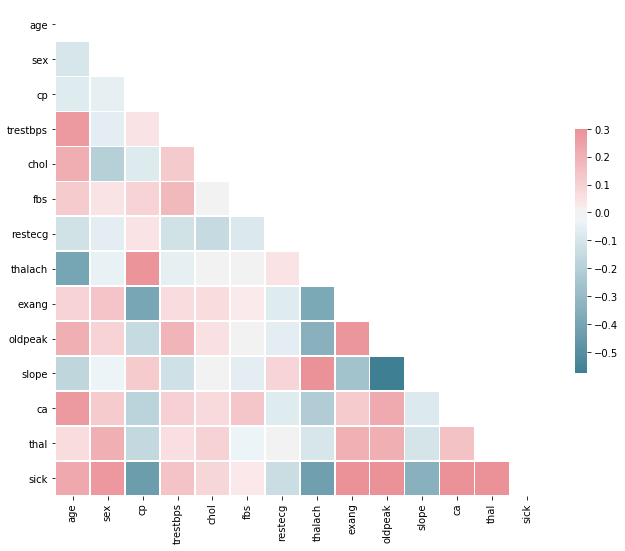

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here, we can see that there a bunch of categorical data that "looks like" numerical data, which makes it difficult to interpret. Therefore, correlations that may seem pretty good such as age and ca are not taken into account as they are not one-hot encoded yet.

**Positive correlations:**
- age and trestbps
- exang and oldpeak
- thalch and slope

The positive correlations make a lot of sense. It makes sense that the older someone, is the higher the resting blood pressure. This is casued by a hardening of blood vessels at older ages which make it prone to hypertension. The other correlations also make sense as if you have a high heart rate when exercising, the ST segment will be increasing. When exercising, the heart has to pump more to keep up with the demans of the body which results in a higher slope in the ST segment.

**Negative correlations:**

- age and thalach
- thalach and exang
- oldpeak and slope



The negative correlations also make sense as they are pretty much similar to the positive correlations. For example, maximum heart rate achieved decreases as age increases because our heart has less potential to pump more blood throughout our body system (it gets weaker over time). We also see a negative correlation between oldpeak and slope which is preciseley the opposite of the positive correlations explain above. Thalach and exang are also pretty self-explanatory.


## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [13]:
sick_arr = patient['sick']
patient = patient.drop(['sick'], axis=1)

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(patient, sick_arr, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(212, 13)
(212,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [15]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

numericalFeatures = ['age','trestbps','chol','thalach','oldpeak','ca']
categoricalFeatures = ['sex','cp','fbs','restecg','exang','slope','thal']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numericalFeatures),
        ("cat", OneHotEncoder(categories='auto'), categoricalFeatures)
])

patient_prepared = full_pipeline.fit_transform(patient)
patient_prepared.shape

(303, 26)

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(patient_prepared, sick_arr, test_size=0.3, random_state=42)
print(X_train2.shape)
print(y_train2.shape)

(212, 26)
(212,)


The difference between the two data types are that the first dataset had no pre-processing and the second dataset
had pre-processing through standardScaler and one-hot encoding. Therefore, the second data type has 13 more columns
due to the one-hot encoding.

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [17]:
from sklearn.svm import SVC

svm = SVC(random_state = 42, probability = True, gamma='scale')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

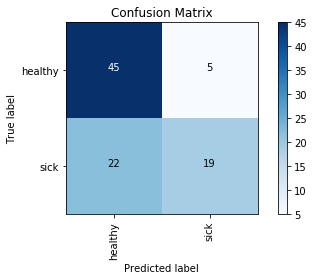

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        50
           1       0.79      0.46      0.58        41

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91

Accuracy:   0.7032967032967034
Precision:  0.7916666666666666
Recall:     0.7032967032967034
F1:         0.5846153846153846


In [18]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score,  plot_roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt 

draw_confusion_matrix(y_test, y_pred, ['healthy', 'sick'])
print(classification_report(y_test, y_pred))
print("Accuracy:  ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", accuracy_score(y_test, y_pred))
print("F1:        ", f1_score(y_test, y_pred))

accuracy = true pos + true neg / total

precision = true pos / true pos + fals pos

recall = true pos / true pos + fals neg

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

**Accuracy**: Accuracy is defined as percentage of correct clasifications. The formula is (TP + TN) / (TP + TN + FP + FN). Here, we are only concerned about how really "correct". This is important because it unconditionally gives insight to how well the alogirthm is doing. Accuracy is a good measure when the target variables in the data are almost balanced (which in this case, could be said). Therefore, accuracy is a good meausre of how well we did, which was 70% in this case. However, accuracy would not be a good measure if we had inbalanced data. Imagine if our data consisted of 200 healthy people and 10 sick people, and we had a bad model that classified everyone as healthy regardeless of the variables. We would end up with an accuracy of 190/200 = 95% which is very high, but then our model would be still be really bad.

**Precision:** Precision is a measure that tells us how good we are in identifying actual "sick" patients or basically what proportion of people we diagnosed as sick, are actually sick. The formula for this is (TP) / (TP + FP). Precision is important because it essentially tells us how good we are at identifying positive results. There are some situations in where we would allow some leverage over precision, like cancer where it would be safer to have false positive over false negatives as the con here would simply be a simple blood test. However, there are cases in where we want precision to be high (where false positives are bad) such as predicting if a particular person commited a crime.


**Recall**: Recall is basically accuracy, but focusing just on the positives, that is, a measure that tells us what proportion of people that actually were sick was diagnosed by the algorithm as sick. The formula for this is (TP) / (TP + FN). Recall is important in cases where we absolutley want to be sure that we identify everyone that is sick, as sick. This could be important in cases such as the new coronavirus, where a false negative would be devastating as that person would be released into the public and be allowed to spread the virus to other people.


**F1 Score:** Carrying around 2 metrics of precision and recall isn't really handy, so the smart statisticains decided to fix this by taking into account, both the precision and recall and presenting it with 1 metric; f1 score. The f1 score is a reports the accuracy of the test, taking into account precision and recall. This is important because of the same reasons that precision and recall is
important. 


**Confusion Matrix:** The confusion matrix is just a 2x2 matrix of True Positive, False Positive, False Negative, True Negative. This shows us a graphical approach to how well our model does, and is the basis for how the above metrics are calculated.

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

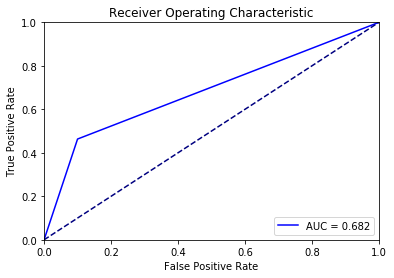

AUC: 0.6817073170731708


In [19]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test, y_pred))

The ROC curve is a graph that basically depicts the accuracy of the test. A perfect ROC curve would be a vertical 180 reversed L-shape (top-left). This is because a true postive rate of 1 means that we classify all positve cases correctly, and a false positve rate of 0 means that we classify all negative cases correclty. The AUC (area under curve) basically sums up the area under the ROC curve, the closer it is to 1, the better. Anything lower than 0.5 would be worse than flipping a coin.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [20]:
svm2 = SVC(random_state = 42, probability = True, gamma='scale')
svm2.fit(X_train2, y_train2)

print(svm2)

y_pred2 = svm2.predict(X_test2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

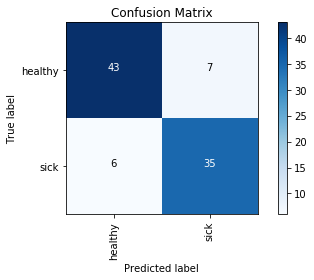

None
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.83      0.85      0.84        41

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Accuracy:   0.8571428571428571
Precision:  0.8333333333333334
Recall:     0.8571428571428571
F1:         0.8433734939759037


In [21]:
print(draw_confusion_matrix(y_test2, y_pred2, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred2))
print("Accuracy:  ", accuracy_score(y_test2, y_pred2))
print("Precision: ", precision_score(y_test2, y_pred2))
print("Recall:    ", accuracy_score(y_test2, y_pred2))
print("F1:        ", f1_score(y_test2, y_pred2))

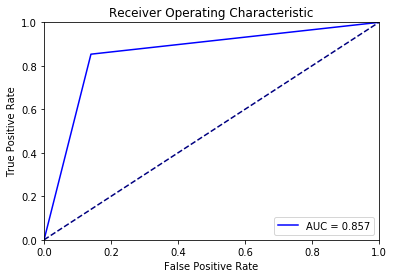

AUC: 0.8568292682926829


In [22]:
fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test2, y_pred2))

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

We see quite a jump in the metrics. This is due to the extra pre-processing of the data. There is more data for the algorithm to work with because we one-hot encoded the binary/limited selection data as well as standard scalar the numerical features. Previously, without pipeline, the categorical featuers basically didn't mean anything as they were discrete data. You could almost even say it was faulty data and kind of making things worse, but with the pipeline, we basically fixed the problem and introduced 7 new features for the algorithm to work with!

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [23]:
svm3 = SVC(random_state = 42, probability = True, gamma='scale', kernel='linear')
svm3.fit(X_train2, y_train2)

print(svm3)

y_pred2 = svm3.predict(X_test2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


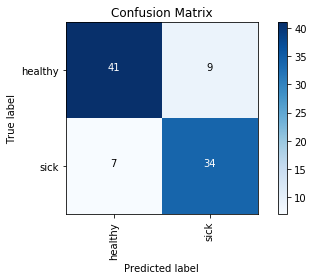

None
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.79      0.83      0.81        41

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Accuracy:   0.8241758241758241
Precision:  0.7906976744186046
Recall:     0.8241758241758241
F1:         0.8095238095238095


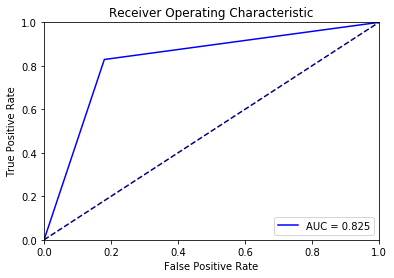

AUC: 0.8246341463414634


In [24]:
print(draw_confusion_matrix(y_test2, y_pred2, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred2))
print("Accuracy:  ", accuracy_score(y_test2, y_pred2))
print("Precision: ", precision_score(y_test2, y_pred2))
print("Recall:    ", accuracy_score(y_test2, y_pred2))
print("F1:        ", f1_score(y_test2, y_pred2))

fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test2, y_pred2))

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

It's actually pretty interesting that setting the kernel to "linear" makes it perform worse. But it's logical because we essentially tell it to have less flexibility in the hyperplane. Here, it's basically acting to divide the data with a straight line (instead of a more flexible curve) which becomes similar to SVM. There are less things you can cover as you're limited to only a straight line.

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'sag', max_iter = 10)
lr.fit(X_train2, y_train2)

print(lr)

y_pred_lr = lr.predict(X_test2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


/Users/kevinwiranata/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


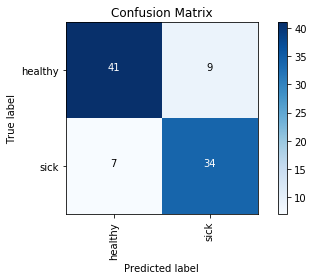

None
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.79      0.83      0.81        41

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Accuracy:   0.8241758241758241
Precision:  0.7906976744186046
Recall:     0.8241758241758241
F1:         0.8095238095238095


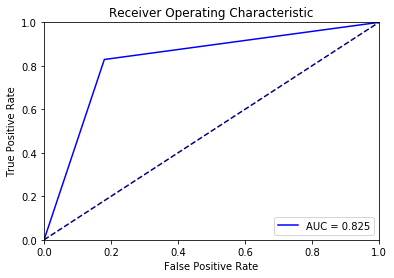

AUC: 0.8246341463414634


In [26]:
print(draw_confusion_matrix(y_test2, y_pred_lr, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred_lr))
print("Accuracy:  ", accuracy_score(y_test2, y_pred_lr))
print("Precision: ", precision_score(y_test2, y_pred_lr))
print("Recall:    ", accuracy_score(y_test2, y_pred_lr))
print("F1:        ", f1_score(y_test2, y_pred_lr))

fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test2, y_pred_lr))

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [27]:
# Logistic Regression 2
lr2 = LogisticRegression(solver = 'sag', max_iter = 100)
lr2.fit(X_train2, y_train2)

print(lr2)

y_pred_lr2 = lr2.predict(X_test2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


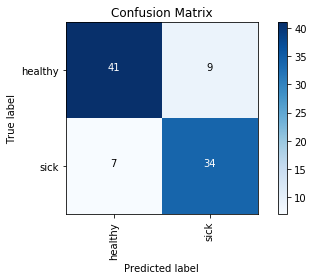

None
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.79      0.83      0.81        41

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Accuracy:   0.8241758241758241
Precision:  0.7906976744186046
Recall:     0.8241758241758241
F1:         0.8095238095238095


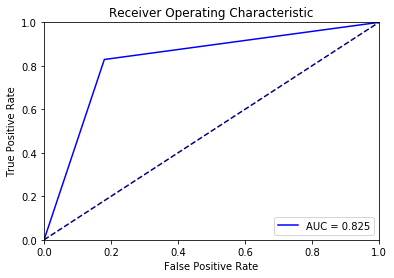

AUC: 0.8246341463414634


In [28]:
print(draw_confusion_matrix(y_test2, y_pred_lr2, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred_lr2))
print("Accuracy:  ", accuracy_score(y_test2, y_pred_lr2))
print("Precision: ", precision_score(y_test2, y_pred_lr2))
print("Recall:    ", accuracy_score(y_test2, y_pred_lr2))
print("F1:        ", f1_score(y_test2, y_pred_lr2))

fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred_lr2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test2, y_pred_lr2))

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

I tried to increase the max_iter option in the logistic regression so that the coefficients would converge but it didn't produce a better outcome. This is probably because we got to a pretty good performance early on and it won't fully converge until a super large number of iterations. 

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [29]:
# Logistic Regression 3
lr3 = LogisticRegression(solver = 'sag', max_iter = 4000, penalty = 'none')
lr3.fit(X_train2, y_train2)

print(lr3)

y_pred_lr3 = lr3.predict(X_test2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


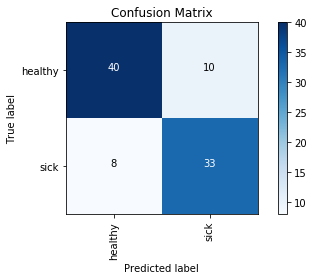

None
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        50
           1       0.77      0.80      0.79        41

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Accuracy:   0.8021978021978022
Precision:  0.7674418604651163
Recall:     0.8021978021978022
F1:         0.7857142857142858


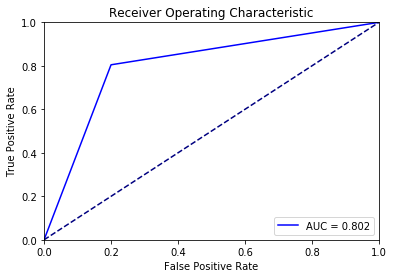

AUC: 0.802439024390244


In [30]:
print(draw_confusion_matrix(y_test2, y_pred_lr3, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred_lr3))
print("Accuracy:  ", accuracy_score(y_test2, y_pred_lr3))
print("Precision: ", precision_score(y_test2, y_pred_lr3))
print("Recall:    ", accuracy_score(y_test2, y_pred_lr3))
print("F1:        ", f1_score(y_test2, y_pred_lr3))

fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred_lr3)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC:", metrics.roc_auc_score(y_test2, y_pred_lr3))

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

The penalty parameter basically regualizes how we converge onto the final values. When we set the paramter to "none", we are basically telling it not to use L1 and L2 regularization and thus do not penalize the algorithm regression if it overfits. The solver method (SAG) is stochastic average gradient and is the convergence algorithm used. This algorithm should converge faster than conventional stochastic gradients because it incorporates a memory of previous gradient values. Therefore, this results in a more optimal outcome, however we may overfit and cause the test accuracy to decrease (which is actually what happened in this case)

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Linear SVM tries to find the best margin (distance between the line and the support vectors) that separates the classes. It uses a kernel function and the KTT conditions to find the "fattest hyperplane" between it and the closest points. This reduces the risk of error on the data. SVM works well with unstructured data and has less risk of overfitting the data.

Logistic Regression on the other hand, finds the boundary line by finding the betas in a linear combination of the inputs. We use the solver method (SAG) in over to maximize convergence in the fastest way possible, with the minimum number of steps needed. However, logistic regression is vunerable to errors in data and overfitting because it can have different decision boundaries with different weights that are near the optimal point.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [31]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # n_neighbors means k
knn.fit(X_train2, y_train2)
print(knn)

y_pred_knn = knn.predict(X_test2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


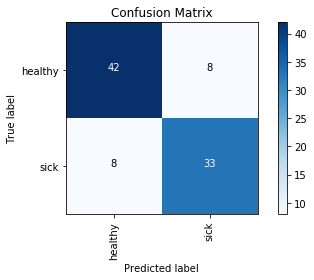

None
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        50
           1       0.80      0.80      0.80        41

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Accuracy:   0.8241758241758241


In [32]:
print(draw_confusion_matrix(y_test2, y_pred_knn, ["healthy", "sick"]))
print(classification_report(y_test2, y_pred_knn))
print("Accuracy:  ", accuracy_score(y_test2, y_pred_knn))

### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [33]:
print("Homogenity Score:            ", metrics.homogeneity_score(y_test2, y_pred))
print("Completeness Score:          ", metrics.completeness_score(y_test2, y_pred))
print("V-measure:                   ", metrics.v_measure_score(y_test2, y_pred))
print("Adjusted Rand Score:         ", metrics.adjusted_rand_score(y_test2, y_pred))
print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y_test2, y_pred))

Homogenity Score:             0.12673018557683646
Completeness Score:           0.1511830586063322
V-measure:                    0.13788084932452155
Adjusted Rand Score:          0.15626509084015064
Adjusted Mutual Information:  0.13014318150428436


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

**Homogenity Score** describes the closeness of the clustering algorithm to a perfect cluster, where each cluster has data-points that belong to the same class lable (in this case, 1 or 0, sick or healthy). Basically, we can tell how much sick people we classify as healthy, and how many healthy people we classify as sick. The homogenity score is pretty low which means that we have quite a lot of missclassifications. 

**Completeness Score** describes how well we cluster members of a class in the correct class. This means we evalute whether all members of a true class is classified correctly. We get a very similar result to the homogenity score because it is essentially the same as we only have 2 clases. It's pretty low for the same reason the homogenity score is low. 

**V-measure**: is kind of like F1-score but for homogenity score and completeness score. The formual for this is V = (1+β) * [(hc) / (βh+c)]. Beta (β) = 1 is the default value taken. When we take the default beta value, this is just calcualting the harmonic mean between the two scores, which is why we get a low result in the measure. This concludes that we have a large amount of mis-clustering and misclassification.

**Adjusted Rand Score**: describes how similar the clusters are from one another. The range is from -1 to 1. 1 can be considered perfect labeling of the data while 0 is just randomly labeling the data. Basically, it gives a measure of how similar the points that are classified as 1 are to those classified as 0. This model is slightly better than random (0.474 > 0) but it's still far from the perfect labling of 1.

**Adjusted Mutual Information**: is also another measure of similarity. In particular, it measures how much information is shared between the clusters, while correcting for chance. We can see how much information we gain as opposed to splitting on the model. The value of 3.76 is pretty low and we conclude that this model shares quite a lot of information between clusters, and that splitting does not work very well.

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [34]:
k_neighbors = [1, 2, 3, 5, 10, 20, 50, 100]
for kn in k_neighbors:
 neighbours = KNeighborsClassifier(n_neighbors=kn)
 neighbours.fit(X_train2, y_train2)
 y_pred = neighbours.predict(X_test2)
 print("For k_neighbors =", kn)
 print("Accuracy:                    ", metrics.accuracy_score(y_test2, y_pred))
 print("Homogenity Score:            ", metrics.homogeneity_score(y_test2, y_pred))
 print("Completeness Score:          ", metrics.completeness_score(y_test2, y_pred))
 print("V-measure:                   ", metrics.v_measure_score(y_test2, y_pred))
 print("Adjusted Rand Score:         ", metrics.adjusted_rand_score(y_test2, y_pred))
 print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y_test2, y_pred))
 print("\n")

For k_neighbors = 1
Accuracy:                     0.8131868131868132
Homogenity Score:             0.3138526823975716
Completeness Score:           0.31166172268482273
V-measure:                    0.31275336545573285
Adjusted Rand Score:          0.3855839416058394
Adjusted Mutual Information:  0.3071474866075198


For k_neighbors = 2
Accuracy:                     0.8131868131868132
Homogenity Score:             0.310728277988173
Completeness Score:           0.3297935231051855
V-measure:                    0.31997716034396384
Adjusted Rand Score:          0.3856506199532277
Adjusted Mutual Information:  0.3142301526043559


For k_neighbors = 3
Accuracy:                     0.7912087912087912
Homogenity Score:             0.2588014178544885
Completeness Score:           0.2580750138955134
V-measure:                    0.2584377054409019
Adjusted Rand Score:          0.33186394830436305
Adjusted Mutual Information:  0.2523750928736536


For k_neighbors = 5
Accuracy:                    

The most optimal result comes from k_neighbor = 50.

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

Clustering algorithms are effective for clustering problems. We use clustering algorithms to classify each data point into a specific group. Therefore, it works best for problems with a large number of data points and multiple different clusters (where there is an actual difference between clusters). Our dataset only has 2 clusters (sick and healthy), which doesn't really make it suitable for k-NN as it is a clustering algorithm. The most optimal result came when we our k_neighbors was 50. This actually makes sense because we have only 2 groups with only about 100+ data points in them which makes it almost separable. Using k=50 makes sure that , there is a much higher chance that those neighbors will be found within the group, except for outliers or those in the boundary. Having such a small k means that we won't sample enough data as we have quite alot of variables and thus, variability of randomly grouping things are higher. However, going we also see that k=100 actually has a lower performance than k=50 and this is because we sample too much of the data for a group (almost 33% of the entire data) and so the circle it tries to draw is probably to large (too big radius).  